In [170]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy.signal import hilbert
from PyEMD import EMD
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load data from the text file
with open('data/IBM.txt', 'r') as file:
    lines = file.readlines()
    data = []
    dates = []

    for line in lines[1:]:
        parts = line.strip().split(',')
        date = parts[0]
        if '1980-12-12' <= date <= '2022-07-22':
            dates.append(date)
            data.append(float(parts[4]))  # 'Close' column

# Create a DataFrame from the loaded data
df = pd.DataFrame({'Date': pd.to_datetime(dates), 'Value': data})

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Extract the values from the DataFrame
signal = df['Value'].values[3000:]

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(signal.reshape(-1, 1))

# Define the training and testing data
train_size = int(len(df_scaled) * 0.8)
train_data = df_scaled[:train_size, :]
test_data = df_scaled[train_size:, :]

import numpy as np

def create_groups(dataset, window_size, step=1):
    X_data, y_data, X_sequences = [], [], []
    index = 0
    
    while index + window_size < len(dataset):
        current_slice = dataset[index:index+window_size]
        
        if not np.isnan(current_slice).all():
            X_data.append(np.mean(current_slice))
            X_sequences.append(current_slice)
            y_data.append(dataset[index + window_size])
        
        index += step
        
    
    
    return np.array(X_data), np.array(y_data), np.array(X_sequences)

window_size = 1
x_train_data, y_train_data, _ = create_groups(train_data, window_size, window_size)
X_test_data, y_test_data, _ = create_groups(test_data, window_size, window_size)

window_size = 3
X_train_1, y_train_1, _ = create_groups(train_data, window_size, window_size)
X_test_1, y_test_1, _ = create_groups(test_data, window_size,window_size)

window_size = 9
X_train_2, y_train_2, _ = create_groups(train_data, window_size, window_size)
X_test_2, y_test_2, _ = create_groups(test_data, window_size, window_size)

In [189]:
train_data.shape

(5992, 1)

In [171]:
x_train_data.shape, X_train_1.shape, X_train_2.shape

((5991,), (1997,), (665,))

In [172]:
y_train_data.shape, y_train_1.shape, y_train_2.shape

((5991, 1), (1997, 1), (665, 1))

In [173]:
X_train_2[:10]

array([0.03238263, 0.02967986, 0.02880145, 0.0289197 , 0.0134801 ,
       0.00939215, 0.00868267, 0.01182464, 0.01275372, 0.01461188])

In [174]:
sequence_length = 8
# bunlar 1li grup
_, _, x_train_data_seq = create_groups(x_train_data, sequence_length, 1 )
_, _, X_test_data_seq = create_groups(X_test_data, sequence_length, 1)
y_train_data = y_train_data[sequence_length:]
y_test_data = y_test_data[sequence_length:]

# bunlar 3lü grup
_, _, X_train_1_seq = create_groups(X_train_1, sequence_length, 1)
_, _, X_test_1_seq = create_groups(X_test_1, sequence_length, 1)
y_train_1 = y_train_1[sequence_length:]
y_test_1 = y_test_1[sequence_length:]

# bunlar 9lu grup
_, _, X_train_2_seq = create_groups(X_train_2, sequence_length, 1)
_, _, X_test_2_seq = create_groups(X_test_2, sequence_length, 1)
y_train_2 = y_train_2[sequence_length:]
y_test_2 = y_test_2[sequence_length:]

In [175]:
x_train_data_seq.shape, X_train_1_seq.shape, X_train_2_seq.shape

((5983, 8), (1989, 8), (657, 8))

In [176]:
y_train_data.shape, y_train_1.shape, y_train_2.shape

((5983, 1), (1989, 1), (657, 1))

In [177]:
x_train_data_seq[:5]

array([[0.03420701, 0.0322306 , 0.03010216, 0.03177451, 0.03040623,
        0.03147045, 0.03390294, 0.03420701],
       [0.0322306 , 0.03010216, 0.03177451, 0.03040623, 0.03147045,
        0.03390294, 0.03420701, 0.03314279],
       [0.03010216, 0.03177451, 0.03040623, 0.03147045, 0.03390294,
        0.03420701, 0.03314279, 0.0302542 ],
       [0.03177451, 0.03040623, 0.03147045, 0.03390294, 0.03420701,
        0.03314279, 0.0302542 , 0.03071029],
       [0.03040623, 0.03147045, 0.03390294, 0.03420701, 0.03314279,
        0.0302542 , 0.03071029, 0.0322306 ]])

In [178]:
X_train_1_seq[:5]

array([[0.03217993, 0.03121706, 0.03375091, 0.03106503, 0.02918998,
        0.02878456, 0.02579462, 0.02858185],
       [0.03121706, 0.03375091, 0.03106503, 0.02918998, 0.02878456,
        0.02579462, 0.02858185, 0.03202789],
       [0.03375091, 0.03106503, 0.02918998, 0.02878456, 0.02579462,
        0.02858185, 0.03202789, 0.03207857],
       [0.03106503, 0.02918998, 0.02878456, 0.02579462, 0.02858185,
        0.03202789, 0.03207857, 0.02873389],
       [0.02918998, 0.02878456, 0.02579462, 0.02858185, 0.03202789,
        0.03207857, 0.02873389, 0.02594665]])

In [179]:
X_train_2_seq[:5]

array([[0.03238263, 0.02967986, 0.02880145, 0.0289197 , 0.0134801 ,
        0.00939215, 0.00868267, 0.01182464],
       [0.02967986, 0.02880145, 0.0289197 , 0.0134801 , 0.00939215,
        0.00868267, 0.01182464, 0.01275372],
       [0.02880145, 0.0289197 , 0.0134801 , 0.00939215, 0.00868267,
        0.01182464, 0.01275372, 0.01461188],
       [0.0289197 , 0.0134801 , 0.00939215, 0.00868267, 0.01182464,
        0.01275372, 0.01461188, 0.01761872],
       [0.0134801 , 0.00939215, 0.00868267, 0.01182464, 0.01275372,
        0.01461188, 0.01761872, 0.01439228]])

In [180]:
# from tensorflow.keras.layers import concatenate
# merged_train_x = concatenate([X_train_2[:, 0, np.newaxis], X_train_1[:, 0, np.newaxis], x_train_data[:, 0, np.newaxis]], axis=0)
# merged_train_y = concatenate([y_train_2, y_train_1, y_train_data])

# merged_test_x = concatenate([X_test_2[:, 0, np.newaxis], X_test_1[:, 0, np.newaxis], X_test_data[:, 0, np.newaxis]], axis=0)
# merged_test_y = concatenate([y_test_2, y_test_1, y_test_data])

In [181]:
x_train_data_seq.shape, y_train_data.shape

((5983, 8), (5983, 1))

In [182]:
# # Reshape the data for LSTM input
# 1li olan
merged_train_x = np.reshape(x_train_data_seq, (x_train_data_seq.shape[0],x_train_data_seq.shape[1],1))
merged_test_x = np.reshape(X_test_data_seq, (X_test_data_seq.shape[0],X_test_data_seq.shape[1],1))

# 3lük olan
merged_train_1_x = np.reshape(X_train_1_seq, (X_train_1_seq.shape[0],X_train_1_seq.shape[1],1))
merged_test_1_x = np.reshape(X_test_1_seq, (X_test_1_seq.shape[0],X_test_1_seq.shape[1],1))

# 9luk olan
merged_train_2_x = np.reshape(X_train_2_seq, (X_train_2_seq.shape[0],X_train_2_seq.shape[1],1))
merged_test_2_x = np.reshape(X_test_2_seq, (X_test_2_seq.shape[0],X_test_2_seq.shape[1],1))

In [188]:
merged_train_x.shape, merged_train_1_x.shape, merged_train_2_x.shape

((5983, 8, 1), (1989, 8, 1), (657, 8, 1))

Epoch 1/10
47/47 [==============================] - 4s 27ms/step - loss: 0.0348 - val_loss: 5.8766e-04
Epoch 2/10
47/47 [==============================] - 1s 17ms/step - loss: 0.0031 - val_loss: 9.4606e-04
Epoch 3/10
47/47 [==============================] - 1s 18ms/step - loss: 0.0027 - val_loss: 6.4105e-04
Epoch 4/10
47/47 [==============================] - 1s 16ms/step - loss: 0.0024 - val_loss: 6.0617e-04
Epoch 5/10
47/47 [==============================] - 1s 16ms/step - loss: 0.0022 - val_loss: 5.9511e-04
Epoch 6/10
47/47 [==============================] - 1s 16ms/step - loss: 0.0021 - val_loss: 6.3066e-04
Epoch 7/10
47/47 [==============================] - 1s 16ms/step - loss: 0.0020 - val_loss: 8.3388e-04
Epoch 8/10
47/47 [==============================] - 1s 17ms/step - loss: 0.0019 - val_loss: 7.1028e-04
Epoch 9/10
47/47 [==============================] - 1s 16ms/step - loss: 0.0019 - val_loss: 5.8545e-04
Epoch 10/10
47/47 [==============================] - 0s 2ms/step
MSE:  0.

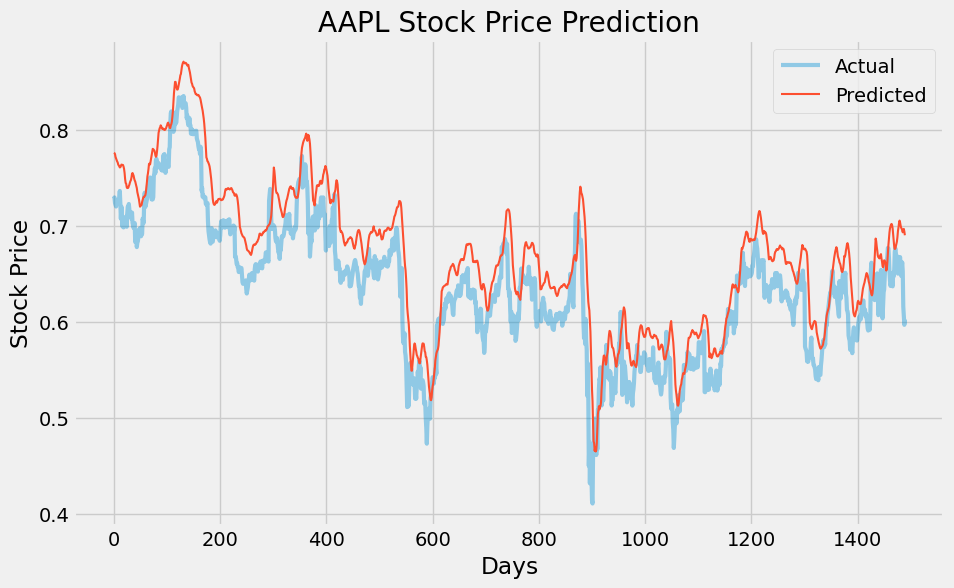

In [184]:
# Build the LSTM model for 1li olan
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(merged_train_x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(merged_train_x, y_train_data, epochs=10, batch_size=128, validation_data=(merged_test_x, y_test_data), verbose=1)

# scores
y_pred = model.predict(merged_test_x)
mse = mean_squared_error(y_test_data, y_pred)
msle = mean_squared_log_error(y_test_data, y_pred)
mae = mean_absolute_error(y_test_data, y_pred)
r2 = r2_score(y_test_data, y_pred)

print('MSE: ', mse)
print('MSLE: ', msle)
print('MAE: ', mae)
print('R-squared: ', r2)

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
plt.plot(y_test_data, label='Actual', linewidth = 3, alpha = 0.4)
plt.plot(y_pred, label='Predicted', linewidth = 1.5)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.legend()
plt.show()

Epoch 1/10
16/16 [==============================] - 3s 56ms/step - loss: 0.0954 - val_loss: 0.0031
Epoch 2/10
16/16 [==============================] - 0s 15ms/step - loss: 0.0151 - val_loss: 0.0068
Epoch 3/10
16/16 [==============================] - 0s 15ms/step - loss: 0.0066 - val_loss: 0.0028
Epoch 4/10
16/16 [==============================] - 0s 15ms/step - loss: 0.0040 - val_loss: 0.0021
Epoch 5/10
16/16 [==============================] - 0s 15ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 6/10
16/16 [==============================] - 0s 16ms/step - loss: 0.0034 - val_loss: 0.0018
Epoch 7/10
16/16 [==============================] - 0s 16ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 8/10
16/16 [==============================] - 0s 16ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 9/10
16/16 [==============================] - 0s 18ms/step - loss: 0.0031 - val_loss: 0.0017
Epoch 10/10
16/16 [==============================] - 0s 2ms/step
MSE:  0.0017485252285722372
MSLE:  0.0006758

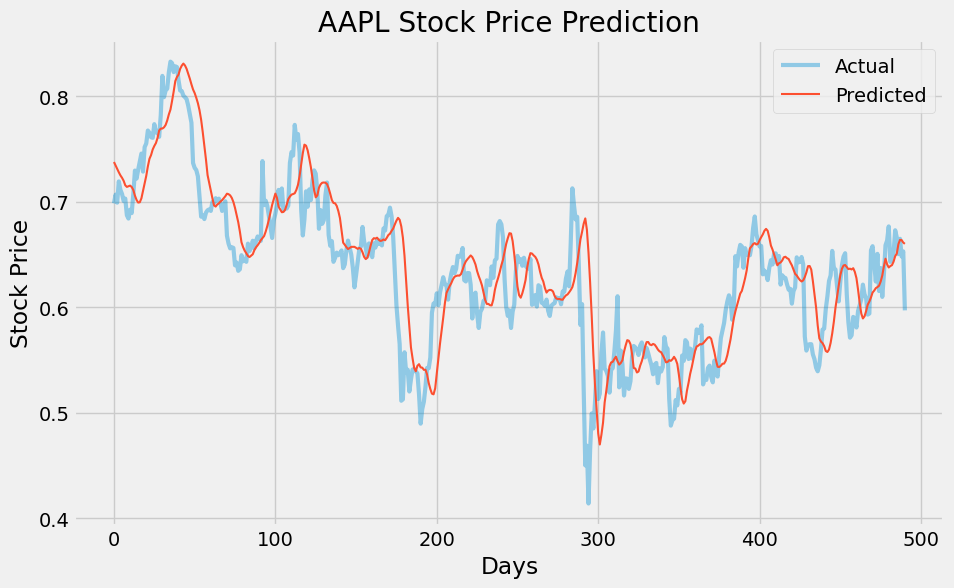

In [185]:
# Build the LSTM model for 3lü olan
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(merged_train_1_x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(merged_train_1_x, y_train_1, epochs=10, batch_size=128, validation_data=(merged_test_1_x, y_test_1), verbose=1)

# scores
y_pred = model.predict(merged_test_1_x)
mse = mean_squared_error(y_test_1, y_pred)
msle = mean_squared_log_error(y_test_1, y_pred)
mae = mean_absolute_error(y_test_1, y_pred)
r2 = r2_score(y_test_1, y_pred)

print('MSE: ', mse)
print('MSLE: ', msle)
print('MAE: ', mae)
print('R-squared: ', r2)

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
plt.plot(y_test_1, label='Actual', linewidth = 3, alpha = 0.4)
plt.plot(y_pred, label='Predicted', linewidth = 1.5)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.legend()
plt.show()

Epoch 1/10
6/6 [==============================] - 2s 98ms/step - loss: 0.1979 - val_loss: 0.1047
Epoch 2/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0359 - val_loss: 0.0395
Epoch 3/10
6/6 [==============================] - 0s 17ms/step - loss: 0.0280 - val_loss: 0.0170
Epoch 4/10
6/6 [==============================] - 0s 17ms/step - loss: 0.0218 - val_loss: 0.0185
Epoch 5/10
6/6 [==============================] - 0s 16ms/step - loss: 0.0135 - val_loss: 0.0048
Epoch 6/10
6/6 [==============================] - 0s 16ms/step - loss: 0.0111 - val_loss: 0.0029
Epoch 7/10
6/6 [==============================] - 0s 16ms/step - loss: 0.0065 - val_loss: 0.0062
Epoch 8/10
6/6 [==============================] - 0s 16ms/step - loss: 0.0067 - val_loss: 0.0032
Epoch 9/10
6/6 [==============================] - 0s 17ms/step - loss: 0.0057 - val_loss: 0.0036
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
MSE:  0.0038285501159719473
MSLE:  0.0014671965812636304
MAE:  0

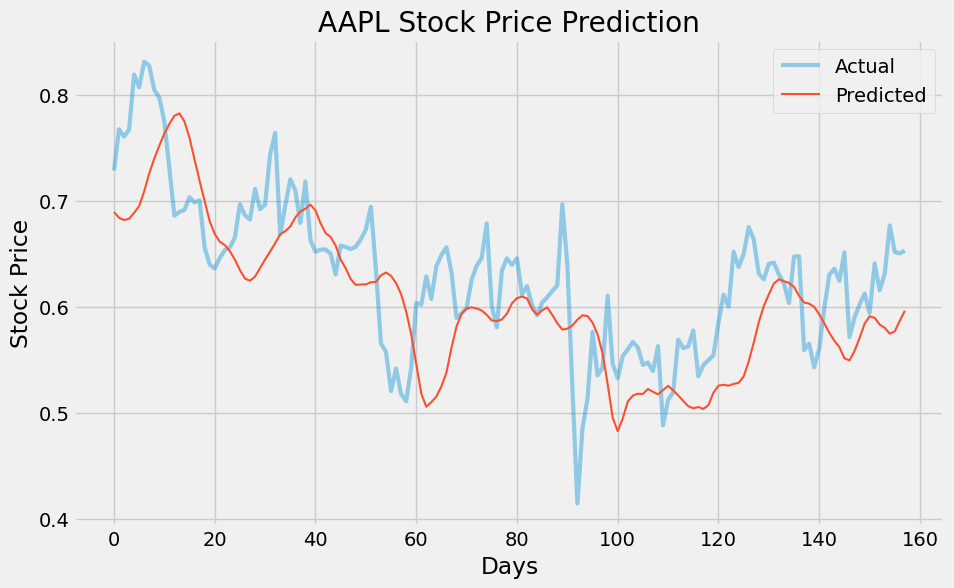

In [186]:
# Build the LSTM model for 9lu olan
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(merged_train_2_x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(merged_train_2_x, y_train_2, epochs=10, batch_size=128, validation_data=(merged_test_2_x, y_test_2), verbose=1)

# scores
y_pred = model.predict(merged_test_2_x)
mse = mean_squared_error(y_test_2, y_pred)
msle = mean_squared_log_error(y_test_2, y_pred)
mae = mean_absolute_error(y_test_2, y_pred)
r2 = r2_score(y_test_2, y_pred)

# scores
print('MSE: ', mse)
print('MSLE: ', msle)
print('MAE: ', mae)
print('R-squared: ', r2)

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
plt.plot(y_test_2, label='Actual', linewidth = 3, alpha = 0.4)
plt.plot(y_pred, label='Predicted', linewidth = 1.5)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.legend()
plt.show()

In [187]:
# 1, 3, 9u birleştirip tekrar deneyelim
